In [0]:
import pandas as pd
data=pd.read_csv(r'creditcard.csv',sep=',')#import dataset
data.info()#data information
data.shape#data size

data[data.isnull().values==True] #find null
data['Hour']=data["Time"].apply(lambda x : divmod(x, 3600)[0])#change time to hours

#Standardize Amount and Hour
from sklearn.preprocessing import StandardScaler # Import module
sc =StandardScaler() # Initialize the scaler
data[['Amount','Hour']] =sc.fit_transform(data[['Amount','Hour']])#Standardize data

data_fruad=data[data['Class']==1]#Fraud data
data_nonfruad=data[data['Class']==0]#not Fraud data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

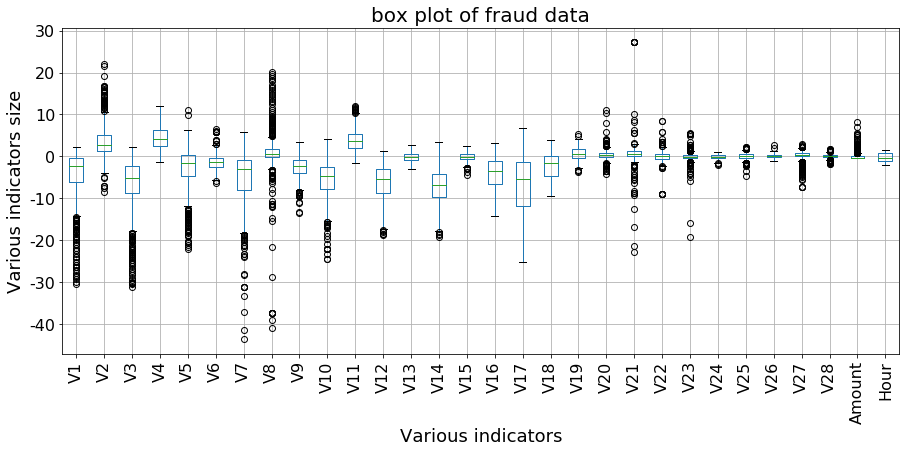

In [0]:
#fraud data Various indicators Plots
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False #show negative'-'
plt.figure(figsize=(15,6))
data_fruad[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount','Hour']].boxplot()
plt.title('box plot of fraud data',fontsize=20)
plt.xlabel('Various indicators',fontsize=18)
plt.ylabel('Various indicators size',fontsize=18)
plt.xticks(rotation=90)#Rotation
plt.tick_params(labelsize=16)#label size
plt.show()

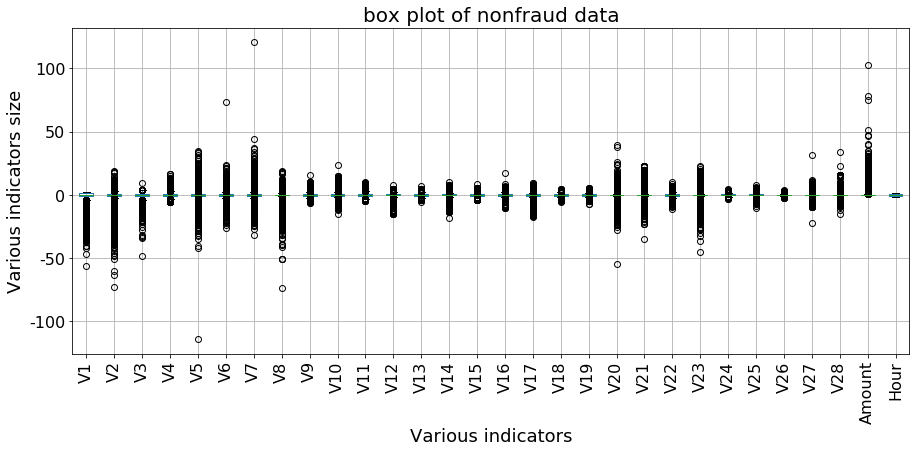

In [0]:
#nonfraud data Various indicators Plots
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False #show negative'-'
plt.figure(figsize=(15,6))
data_nonfruad[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount','Hour']].boxplot()
plt.title('box plot of nonfraud data',fontsize=20)
plt.xlabel('Various indicators',fontsize=18)
plt.ylabel('Various indicators size',fontsize=18)
plt.xticks(rotation=90)#Rotation
plt.tick_params(labelsize=16)#label size
plt.show()

as we can see, It can be seen that the box of each indicator variable of the normal sample is at 0, that is, the distribution of the normal sample is symmetric  about 0, and the box of the fraud sample obviously fluctuates around 0, showing a significant left deviation or right.

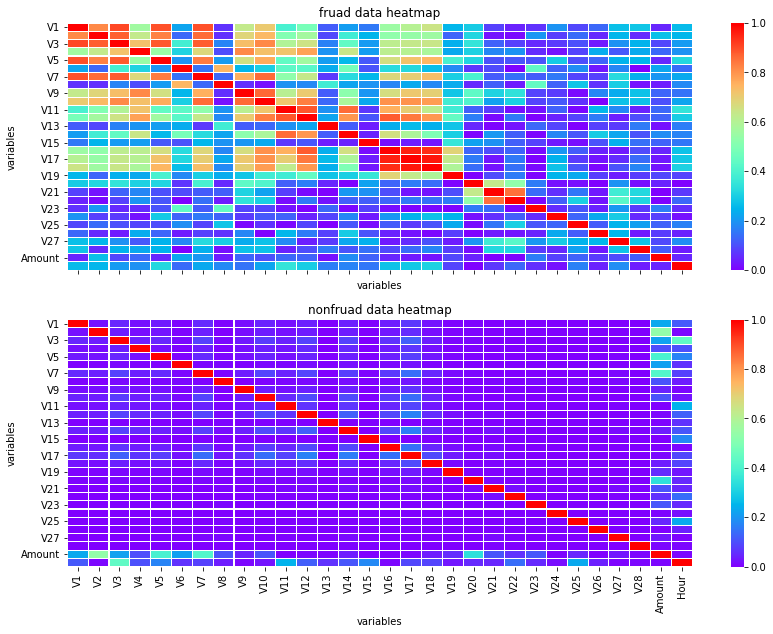

In [0]:
#heatmap
import seaborn as sns
x_feature = list(data.columns)
x_feature.remove('Time')
x_feature.remove('Class')
corr_fruad=data_fruad[x_feature].corr()
corr_fruad=abs(corr_fruad)
corr_nonfruad=data_nonfruad[x_feature].corr()
corr_nonfruad=abs(corr_nonfruad)
f,(ax1,ax2)=plt.subplots(figsize=(14,10),nrows=2)
#cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)
sns.heatmap(corr_fruad,ax=ax1,vmax=1,vmin=0,annot=False,linewidths=0.05,cmap='rainbow')
ax1.set_title('fruad data heatmap')
ax1.set_xlabel('variables')
ax1.set_xticklabels([]) #set x as null
ax1.set_ylabel('variables')
sns.heatmap(corr_nonfruad,ax=ax2,vmax=1,vmin=0,annot=False,linewidths=0.05,cmap='rainbow')
ax2.set_title('nonfruad data heatmap')
ax2.set_xlabel('variables')
ax2.set_ylabel('variables')
plt.show()


Text(0.5, 1.0, 'nonfruad')

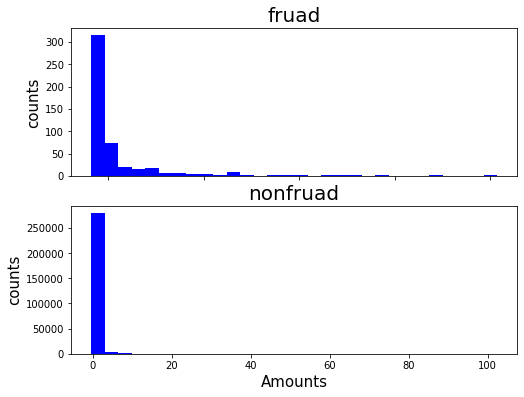

In [0]:
#Amount Histogram
f,(ax1,ax2)=plt.subplots(figsize=(8,6),nrows=2)
ax1.hist(data_fruad['Amount'],bins=30,color='b')
ax1.set_ylabel('counts',fontsize=15)
ax1.set_xticklabels([]) 
ax1.set_title('fruad',fontsize=20)

ax2.hist(data_nonfruad['Amount'],bins=30,color='b')
ax2.set_ylabel('counts',fontsize=15)
ax2.set_xlabel('Amounts',fontsize=15)
ax2.set_title('nonfruad',fontsize=20)

According to the difference between the distribution of the fraud sample and the normal sample of each variable, if the distribution of the fraud sample and the normal sample is not large, the feature can be removed.

In [0]:
from matplotlib import gridspec
plt.figure(figsize=(16,30*4))
gs = gridspec.GridSpec(30, 1)#creat 20-1
for i, cn in enumerate(data[x_feature]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[cn][data["Class"] == 1], bins=50)
    sns.distplot(data[cn][data["Class"] == 0], bins=100)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))


as the result, the V8 V13 V16 V20 V22 V23 V25 V26 V27 V28 can be removed.

Lasso picked 17 variables and eliminated the other 13 variables


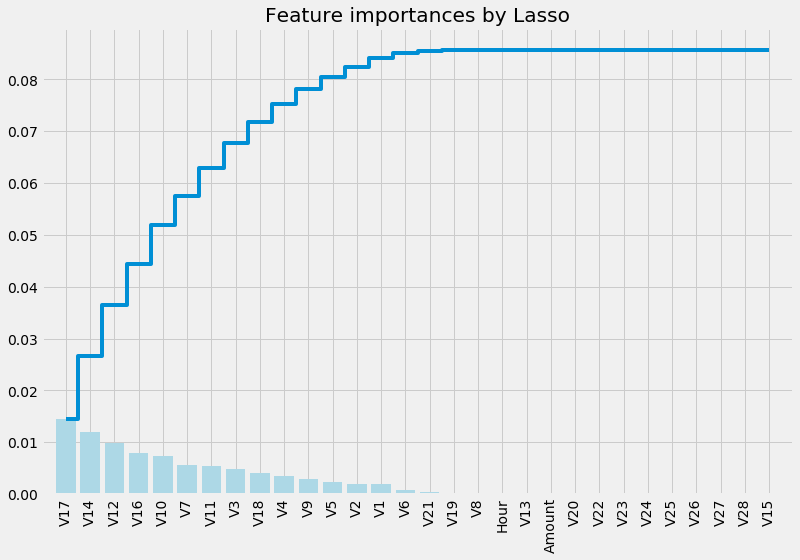

In [0]:
#choose values
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

x_values=data[x_feature]
y_values=data['Class']

#use LassoCV,cross-validate,cv=3
model_lasso = LassoCV(alphas = [0.1,1,0.001, 0.0005]).fit(x_values, y_values)

#output to see The model finally selected several feature vectors, and eliminated several feature vectors
coef = pd.Series(model_lasso.coef_, index = x_feature)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

#Visualize the importance of each variable
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')  
names = data[x_feature].columns
importances = np.abs(model_lasso.coef_)
feat_names = names
indices = np.argsort(importances)[::-1]  #index
fig = plt.figure(figsize=(12,8))
plt.title("Feature importances by Lasso")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

('V1', 0.01255155895469827)
('V2', 0.010258682700056119)
('V3', 0.022925924001976065)
('V4', 0.01990092290532789)
('V5', 0.006144344555808628)
('V6', 0.011598483302581862)
('V7', 0.046711128539617265)
('V8', 0.009543719180823583)
('V9', 0.04218100306801641)
('V10', 0.06933387782893283)
('V11', 0.0575548488134696)
('V12', 0.19935458096055644)
('V13', 0.009244940258822382)
('V14', 0.09351564013911523)
('V15', 0.011153146714092416)
('V16', 0.10082423745559524)
('V17', 0.1322246078234263)
('V18', 0.01684597855618915)
('V19', 0.009346897541206507)
('V20', 0.010337983008098725)
('V21', 0.007904049588120899)
('V22', 0.013094705650122569)
('V23', 0.009725079788514352)
('V24', 0.011855241749417978)
('V25', 0.005322977465840968)
('V26', 0.01359867239041409)
('V27', 0.017127572536601108)
('V28', 0.008984843861236508)
('Amount', 0.010908430417349114)
('Hour', 0.009925920243971506)


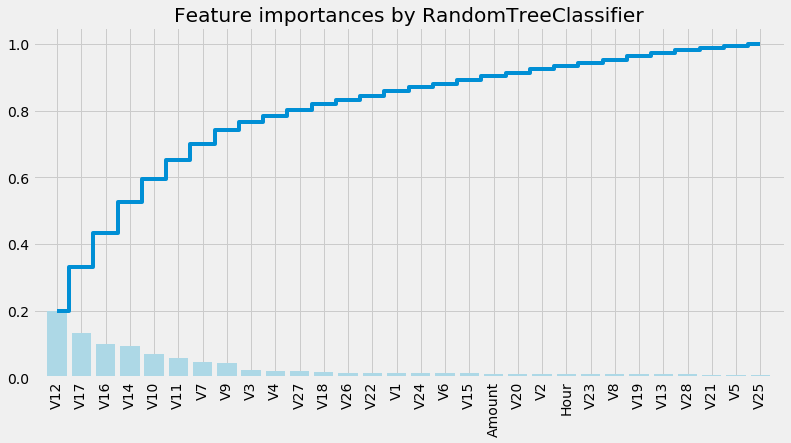

In [0]:
#ramdom forest feature importance
from sklearn.ensemble import RandomForestClassifier
names = data[x_feature].columns
clf=RandomForestClassifier(n_estimators=10,random_state=123)#classification random forest classifier
clf.fit(x_values, y_values) #Fit independent and dependent variables
for feature in zip(names, clf.feature_importances_):
    print(feature)

#Visualize various important orders determined by random forest classifier
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#plt.rcParams['figure.figsize'] = (12,6)#set size
importances = clf.feature_importances_
feat_names = names
indices = np.argsort(importances)[::-1]#index
fig = plt.figure(figsize=(12,6))
plt.title("Feature importances by RandomTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()
